Ordinary least squares example

Static car model: data distribution study

In [1]:
using Random
using LaTeXStrings
using StatsPlots

Set some example car paramters

In [2]:
m = 1500; # mass of car in kg
g = 9.81; # gravity in m/s^2
ρ = 1.29; # density of air in kg/m^3
A = 2.0; # frontal area of car in m^2
Cd = 0.35; # drag coefficient
Cr = 0.015; # rolling resistance coefficient
η  = 4.5; # Bearing friction coefficient in kg/s

α, β, γ = m*g*Cr, η, (ρ*A*Cd)/2; # condense parameters

Generate data with fixed number of data points but with a thin or broad distributin and solve OLS problem. 
Run each configuration 100 times.

In [3]:
w_hat = zeros(5,100,3) # pre-init identified parameters
w_err = zeros(5,100,3) # pre-init parameter errors

for ii = 1:5
    v = LinRange(0, 40*ii/3.6, 1000); # vector of measured velocities in m/s with different velocity ranges
    Z = [v v.^2 v.^3]; # regressor matrix
    P = α*v + β*v.^2 + γ*v.^3; # vector of car power in W
    for jj = 1:100
        Y = P + randn(length(P))*1000; # add some noise to the measurements 
        w_hat[ii, jj, :] = inv(Z'*Z)*Z'*Y # OLS solution
        w_err[ii, jj, :] = [α; β; γ] - w_hat[ii, jj, :] # parameter error
    end
end

Generate box plots of parameter errors over data samples distribution

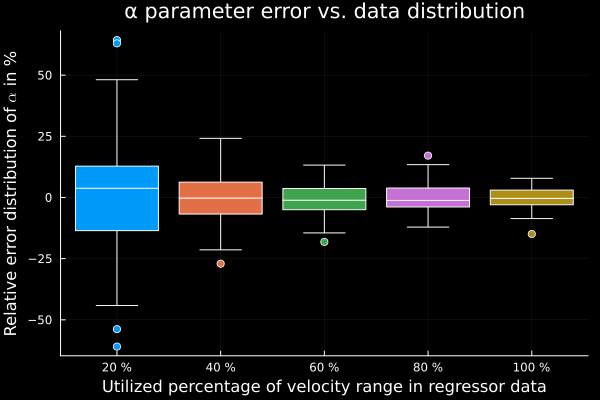

In [4]:
# alpha parameter
boxplot(w_err[:,:,1]'/α*100, xticks = (1:5, ["20 %"; "40 %"; "60 %"; "80 %"; "100 %"]), 
xlabel = "Utilized percentage of velocity range in regressor data", 
ylabel = L"Relative error distribution of $\alpha$ in %" , 
title = "α parameter error vs. data distribution", 
legend = false, background_color="#000000")

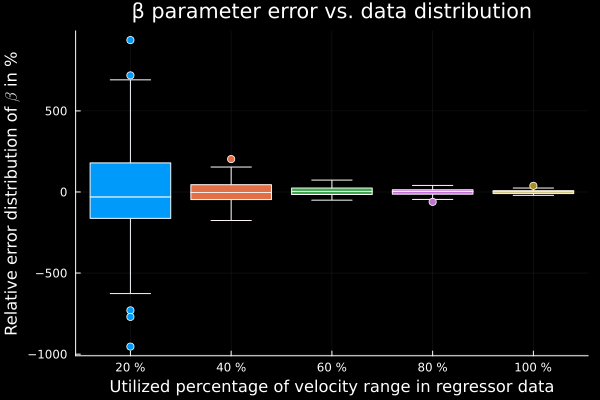

In [5]:
# beta parameter
boxplot(w_err[:,:,2]'/β*100, xticks = (1:5, ["20 %"; "40 %"; "60 %"; "80 %"; "100 %"]), 
xlabel = "Utilized percentage of velocity range in regressor data", 
ylabel = L"Relative error distribution of $\beta$ in %" , 
title = "β parameter error vs. data distribution", 
legend = false, background_color="#000000")

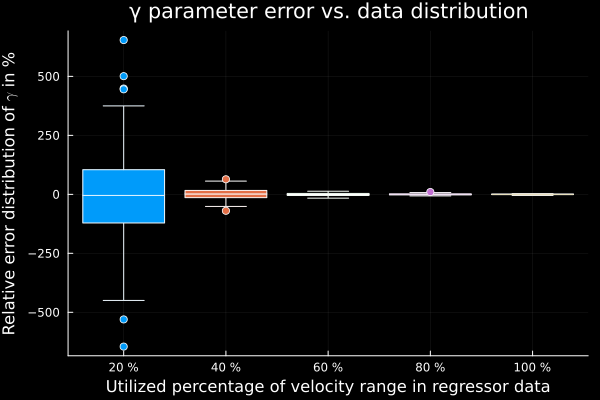

In [6]:
# gamma parameter
boxplot(w_err[:,:,3]'/γ*100, xticks = (1:5, ["20 %"; "40 %"; "60 %"; "80 %"; "100 %"]), 
xlabel = "Utilized percentage of velocity range in regressor data", 
ylabel = L"Relative error distribution of $\gamma$ in %" , 
title = "γ parameter error vs. data distribution", 
legend = false, background_color="#000000")